# CSCN8000 –Artificial Intelligence Algorithms and Mathematics


## Lab 3: California Housing Prices Prediction


### Dataset file: housing_dataset.csv


In [1]:
# All libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
# Data in 'data_JB'

data_JB = pd.read_csv('housing_dataset.csv')

# Data Preprocessing Tasks (21 Points):

##### 1. (4 points) Detect and handle outliers for the “median_house_value” field using:
##### a. Apply the whiskers approach to identify outlier rows.


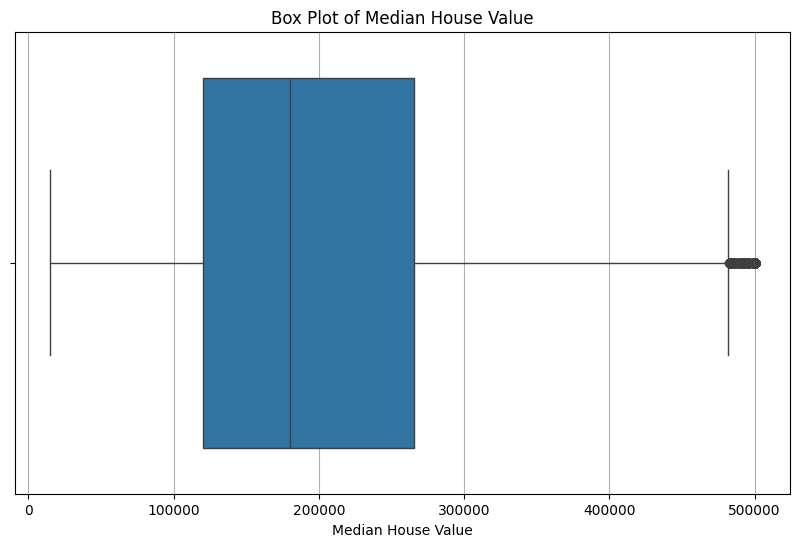

In [3]:
# Calculate IQR

Q1 = data_JB['median_house_value'].quantile(0.25)
Q3 = data_JB['median_house_value'].quantile(0.75)
IQR = Q3 - Q1           # Got our IQR

# For upper & lower bound 
lower_b = Q1 - 1.5 * IQR
upper_b = Q3 + 1.5 * IQR


# Box plot of 'median_house_value'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_JB['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Value')
plt.grid(axis='x')
plt.show()


##### Just a snippet of scatter plot

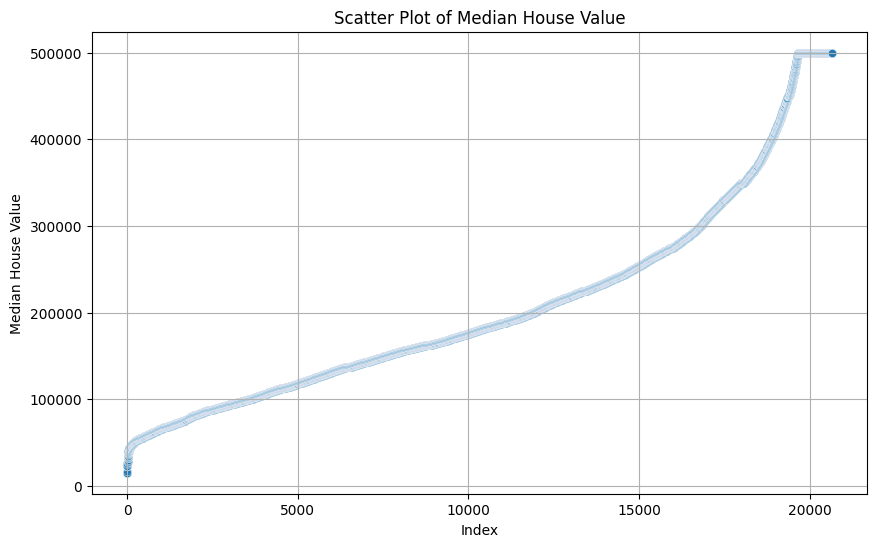

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_JB.index, y='median_house_value', data=data_JB, alpha=0.5)
plt.title('Scatter Plot of Median House Value')
plt.xlabel('Index')
plt.ylabel('Median House Value')
plt.grid()
plt.show()

In [5]:
data_JB.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20629.000000,20625.000000,20433.000000,20621.000000,20626.000000,20632.000000,20560.000000
mean,-119.569704,35.631861,28.633380,2636.314812,537.870553,1425.785510,499.675555,3.871003,207334.239348
std,2.003532,2.135952,12.584167,2182.184573,421.385070,1132.799376,382.405161,1.899969,115352.171422
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563400,120600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,410.000000,3.535250,180400.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,265225.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data_JB.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN


##### Handling the outliers

In [7]:
outliers = data_JB[(data_JB['median_house_value'] < lower_b) | (data_JB['median_house_value'] > upper_b)]
count_of_outliers = len(outliers)

In [8]:
print(outliers)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19568    -118.37     33.81                33.0       5057.0           790.0   
19569    -117.19     32.69                35.0       2921.0           438.0   
19570    -117.87     33.60                34.0       3415.0           779.0   
19571    -118.59     34.14                19.0       1303.0           155.0   
19572    -122.18     37.81                30.0        292.0            38.0   
...          ...       ...                 ...          ...             ...   
20635    -118.90     34.14                35.0       1503.0           263.0   
20636    -118.69     34.18                11.0       1177.0           138.0   
20637    -118.80     34.19                 4.0      15572.0          2222.0   
20638    -118.69     34.21                10.0       3663.0           409.0   
20639    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  media

In [9]:
print(count_of_outliers)
print(len(data_JB))

1072
20640


In [10]:
# Handled data after assessing outliers
data_filtered = data_JB[(data_JB['median_house_value'] >= lower_b) & (data_JB['median_house_value'] <= upper_b)]

# Verify the number of remaining rows
print(f'Number of rows after removing outliers: {len(data_filtered)}')

Number of rows after removing outliers: 19488


##### Upon examining the extreme values in the `median_house_value` column, it was revealed that there are 1072 data points identified as outliers using the lower and upper boundaries determined by the interquartile range (IQR) technique

##### b. (Optional) Apply Z-score normalization and choose appropriate threshold to match the outliers from the whiskers approach (1 bonus point)



In [11]:
# We already saw the mean and standard deviation above so for calculation of z-score 
mean_JB = data_JB['median_house_value'].mean()
std_JB = data_JB['median_house_value'].std()

# Z-score
data_JB['z_score'] = (data_JB['median_house_value'] - mean_JB) / std_JB

In [12]:
# Well depending on the threshold I'm identifying outliers based on z-score
threshold = 2.5
z_outliers = data_JB[(data_JB['z_score'] > threshold) | (data_JB['z_score'] < -threshold)]
count_z_outliers = len(z_outliers)

print("Based on Thershold = 2.5, the count of outliers are : ", count_z_outliers)

Based on Thershold = 2.5, the count of outliers are :  1005


##### A Z-score threshold of 2.5 resulted in 1005 outliers, showing that a substantial portion of data points in the `median_house_value` dataset are considered outliers based on this criterion.


##### 2. (5 points) Handle missing values in the dataset:
##### a. For numerical features:
##### i. Choose whether mean/median is better to impute the values


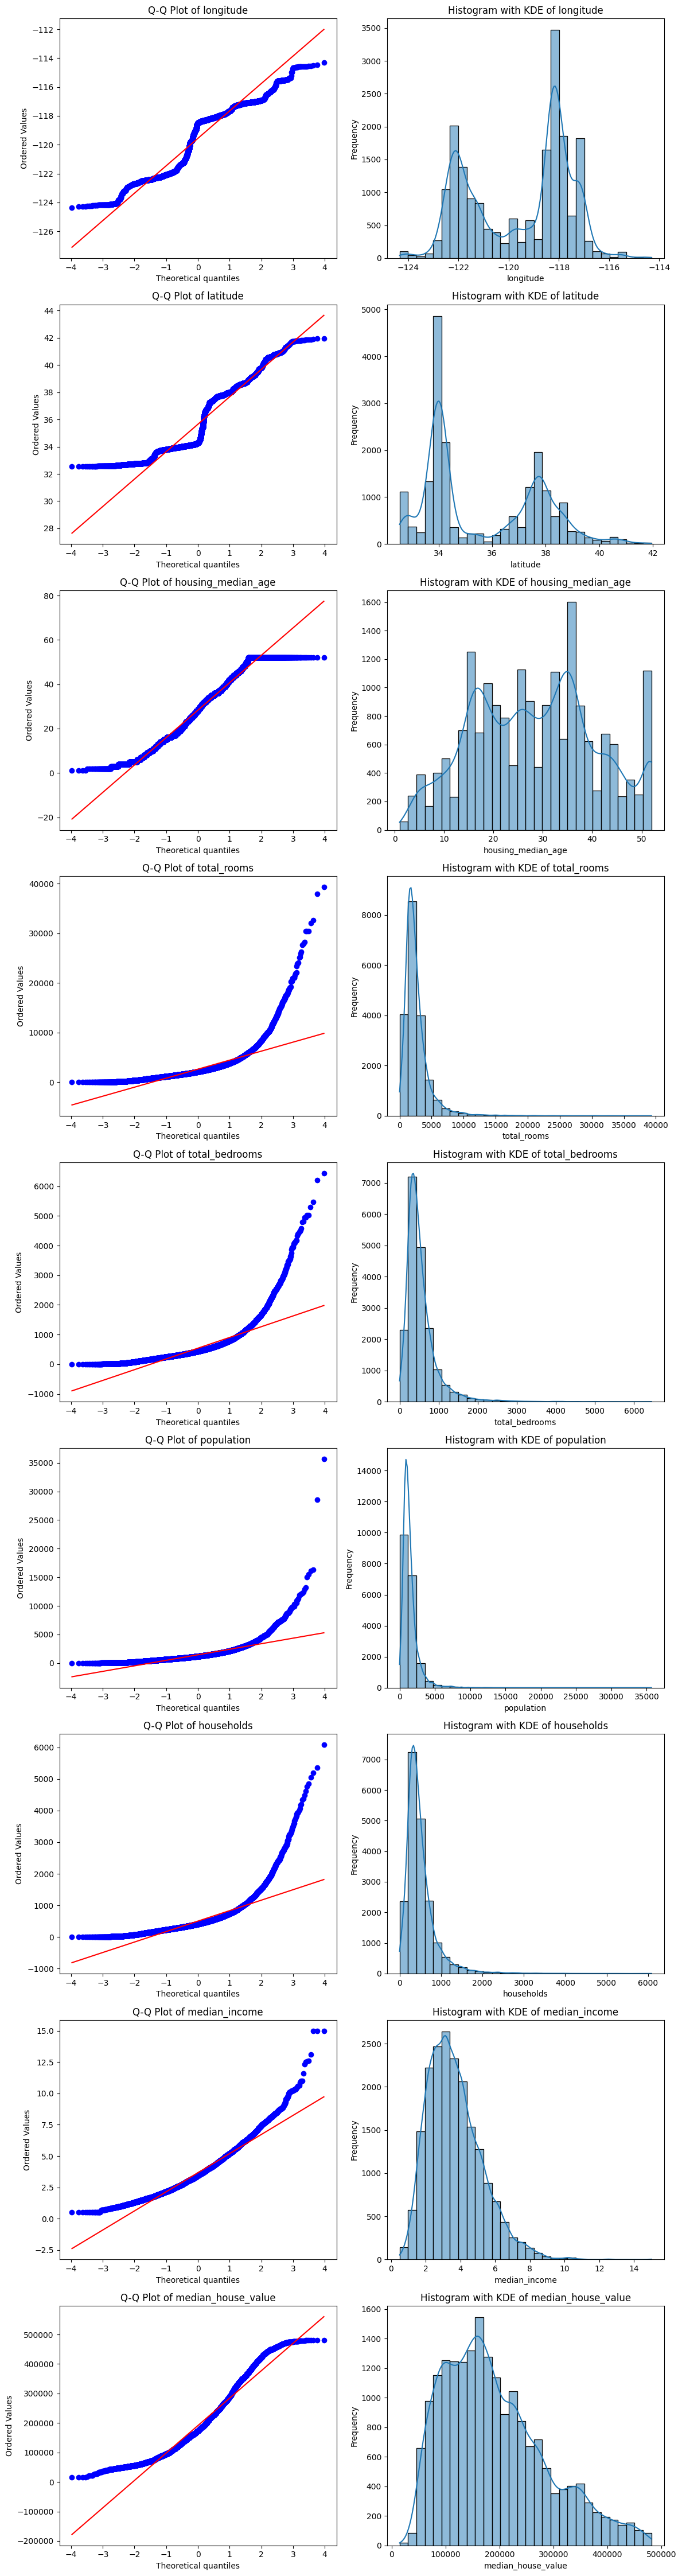

In [13]:
# Identify numerical features
numeric_features = data_filtered.select_dtypes(include=['float64', 'int64']).columns

# Set up the grid for plots
num_features = len(numeric_features)
fig, axes = plt.subplots(num_features, 2, figsize=(12, 5 * num_features))

# Loop through each numeric feature to create Q-Q plots and histograms
for i, feature in enumerate(numeric_features):
    # Q-Q Plot
    stats.probplot(data_filtered[feature].dropna(), dist="norm", plot=axes[i][0])
    axes[i][0].set_title(f'Q-Q Plot of {feature}')
    
    # Histogram with KDE
    sns.histplot(data_filtered[feature], bins=30, kde=True, ax=axes[i][1])
    axes[i][1].set_title(f'Histogram with KDE of {feature}')
    axes[i][1].set_xlabel(feature)
    axes[i][1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### - For characteristics that show a typical distribution (bell curve and balanced Q-Q plots and histograms):
#### Employ Mean Imputation: The mean is suitable for these attributes, as they exhibit characteristics closely resembling normal distribution.

##### - When features show skewness or departures from normality (such as histograms not shaped like a bell curve or Q-Q plots indicating a noticeable deviation from the expected line):
##### Consider utilizing median imputation for these features, as it is less influenced by outliers and skewed distributions.


##### Fill in missing data in features that follow a normal distribution by using the average value.

##### Use the median to fill in missing values in features that are not normally distributed or skewed.



##### ii. (Optional) look for other ways to impute based on other categorical variables (1 bonus point)


##### b. For categorical features: Choose the appropriate imputation method.


In [14]:
unique_count = data_filtered['ocean_proximity'].nunique()
print(f'Number of unique categories: {unique_count}')
category_counts = data_filtered['ocean_proximity'].value_counts()
print(category_counts)

Number of unique categories: 7
ocean_proximity
<1H OCEAN     8447
INLAND        6448
NEAR OCEAN    2392
NEAR BAY      2002
NEAR_bay        32
inland          15
ISLAND           5
Name: count, dtype: int64


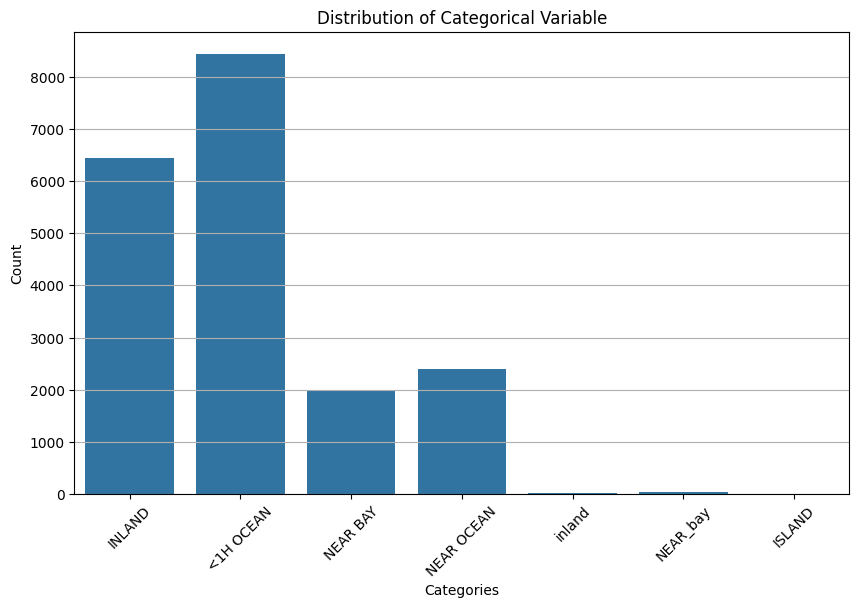

In [15]:
# Create a bar plot for the categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=data_filtered)
plt.title('Distribution of Categorical Variable')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.grid(axis='y')
plt.show()

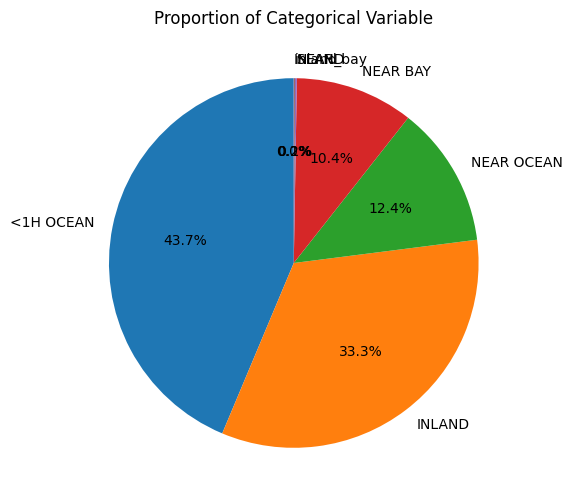

In [16]:
# Create a pie chart for the categorical variable
plt.figure(figsize=(10, 6))
data_filtered['ocean_proximity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Categorical Variable')
plt.ylabel('')  # Hide the y-label
plt.show()

##### Opting for mode imputation utilizes the most common category in our dataset, resulting in a more accurate and stable dataset for further analysis.

In [17]:
# # Impute missing values using the mode

# Calculate the mode value
mode_value = data_filtered['ocean_proximity'].mode()[0]

# Use .loc to assign the mode value to NaNs directly in the filtered DataFrame
data_filtered.loc[data_filtered['ocean_proximity'].isnull(), 'ocean_proximity'] = mode_value
missing_count_after = data_filtered['ocean_proximity']
print(f'Missing values after imputation: {missing_count_after}')



Missing values after imputation: 0            INLAND
1            INLAND
2            INLAND
3            INLAND
4         <1H OCEAN
            ...    
19563     <1H OCEAN
19564    NEAR OCEAN
19565     <1H OCEAN
19566     <1H OCEAN
19567     <1H OCEAN
Name: ocean_proximity, Length: 19488, dtype: object


##### 3. (3 points) Investigate the existence of errors/inconsistencies in the fields and solve them.


In [18]:
# Checking for Missing Values: Identify any fields with missing values.
print(data_filtered.isnull().sum())

# Check for missing values
missing_values = data_filtered.isnull().sum()
print(missing_values[missing_values > 0])  # Only show features with missing values

# Identify Unique Values in Numerical Fields: Checking for unexpected values such as negative numbers in fields like median_house_value, which should ideally be non-negative.
print(data_filtered['median_house_value'].unique())
print(data_filtered[data_filtered['median_house_value'] < 0])  # Check for negative values


# Imputing with median to handle missing values
data_filtered.loc[data_filtered['median_house_value'] < 0, 'median_house_value'] = data_filtered['median_house_value'].median()  # Impute with median

data_filtered.dropna(inplace=True)  # Dropped any rows with missing values since the count is small compared to data




longitude               0
latitude                0
housing_median_age      3
total_rooms            11
total_bedrooms        200
population             10
households             14
median_income           4
median_house_value      0
ocean_proximity         0
dtype: int64
housing_median_age      3
total_rooms            11
total_bedrooms        200
population             10
households             14
median_income           4
dtype: int64
[ 14999.  17500.  22500. ... 480800. 481300. 481500.]
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\139837609.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.dropna(inplace=True)  # Dropped any rows with missing values since the count is small compared to data


In [19]:
category_counts = data_filtered['ocean_proximity'].value_counts()
print(category_counts)

# Standardizing category names using .loc to avoid SettingWithCopyWarning

data_filtered.loc[:, 'ocean_proximity'] = data_filtered['ocean_proximity'].str.upper()  # Converting to uppercase
data_filtered.loc[:, 'ocean_proximity'] = data_filtered['ocean_proximity'].str.replace('_', ' ')  # Replacing underscores with spaces

# Check unique categories after cleaning
unique_categories = data_filtered['ocean_proximity'].unique()
print(f'Unique categories after cleaning: {unique_categories}')

ocean_proximity
<1H OCEAN     8476
INLAND        6394
NEAR OCEAN    2365
NEAR BAY      1973
NEAR_bay        32
inland          14
ISLAND           5
Name: count, dtype: int64
Unique categories after cleaning: ['INLAND' '<1H OCEAN' 'NEAR BAY' 'NEAR OCEAN' 'ISLAND']


In [20]:
print(data_filtered.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


##### 4. (3 points) Normalize numerical features using appropriate method based on feature characteristics.


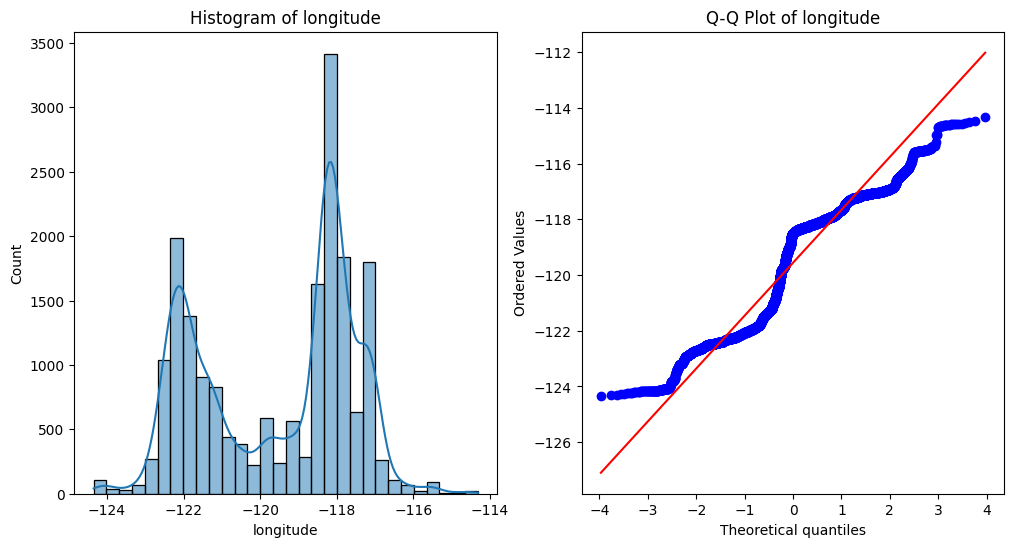

Skewness of longitude: -0.2874690643367212
Standardized longitude


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\521469901.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = scaler.fit_transform(data_filtered[[feature]])


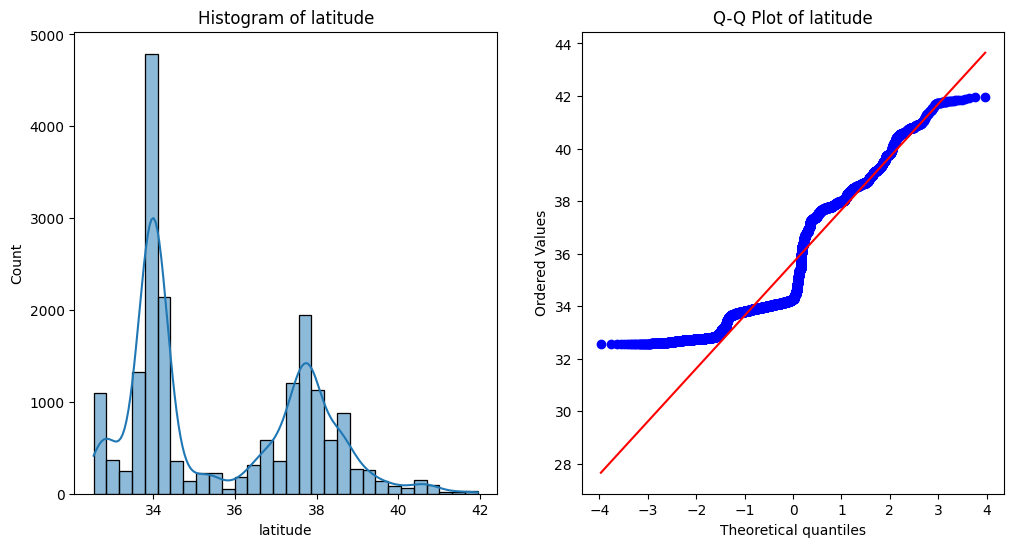

Skewness of latitude: 0.45342159267463195
Standardized latitude


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\521469901.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = scaler.fit_transform(data_filtered[[feature]])


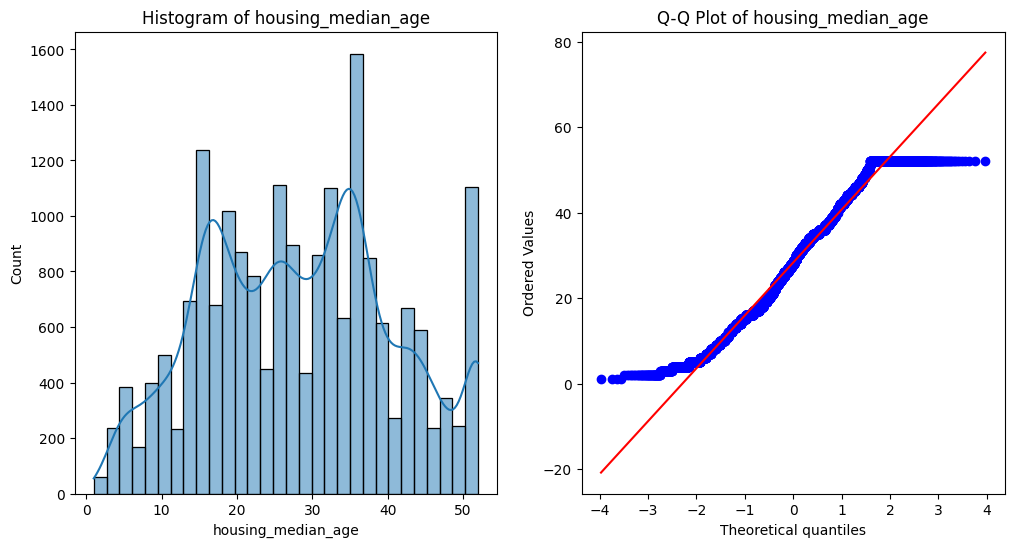

Skewness of housing_median_age: 0.0757540374419257
Standardized housing_median_age


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\521469901.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = scaler.fit_transform(data_filtered[[feature]])


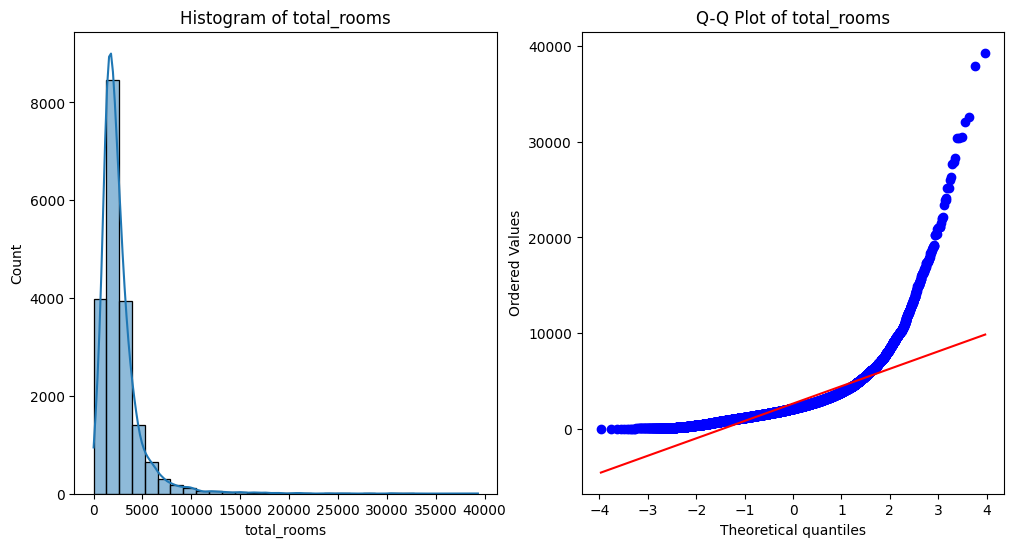

Skewness of total_rooms: 4.238485704500561
Log transformed total_rooms


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\521469901.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = np.log1p(data_filtered[feature])


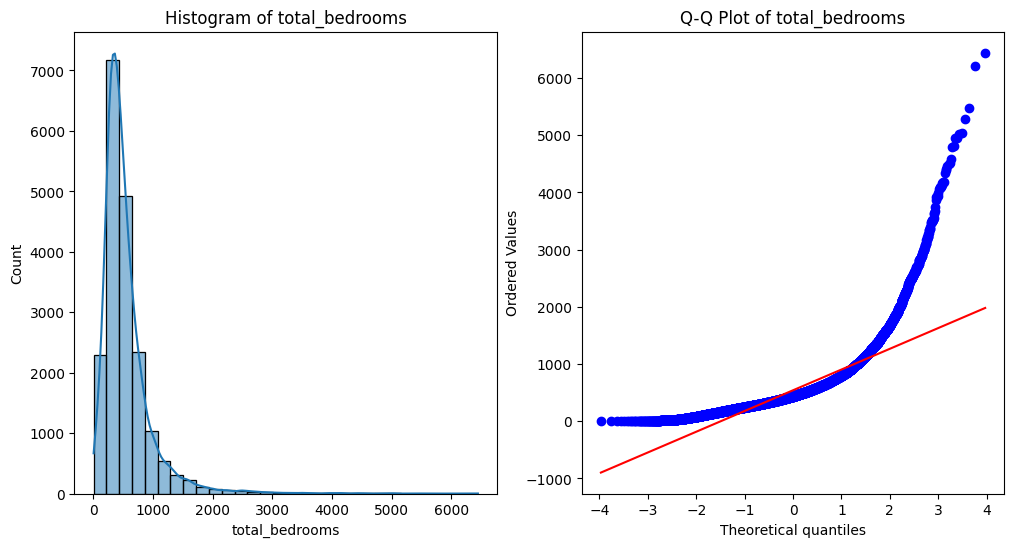

Skewness of total_bedrooms: 3.4565993431216926
Log transformed total_bedrooms


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\521469901.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = np.log1p(data_filtered[feature])


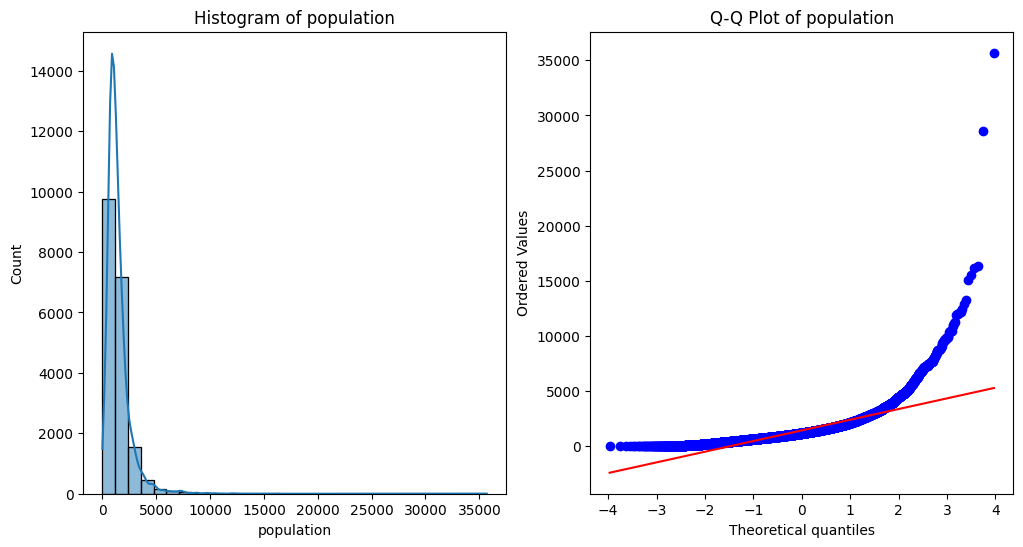

Skewness of population: 4.986074540129245
Log transformed population


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\521469901.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = np.log1p(data_filtered[feature])


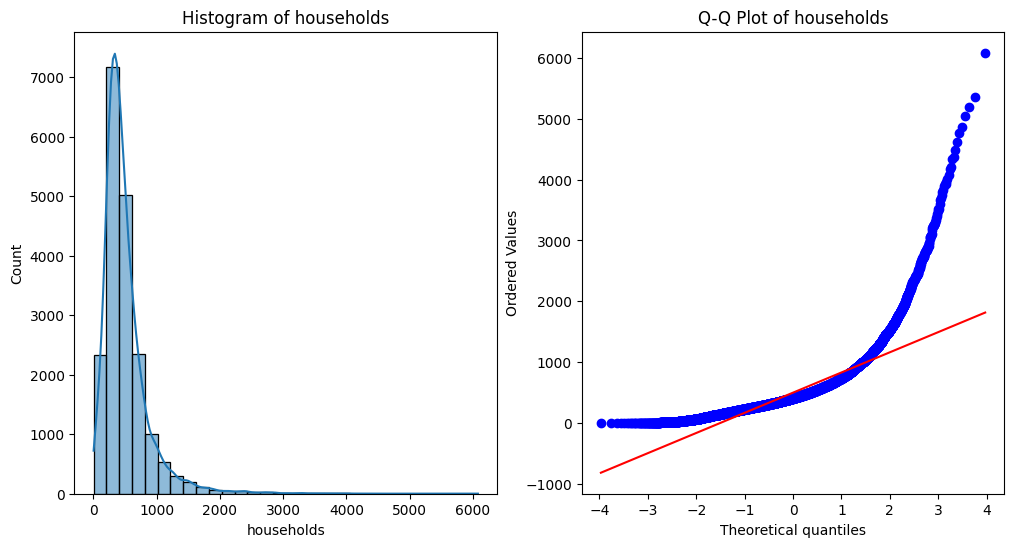

Skewness of households: 3.4094838508518674
Log transformed households


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\521469901.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = np.log1p(data_filtered[feature])


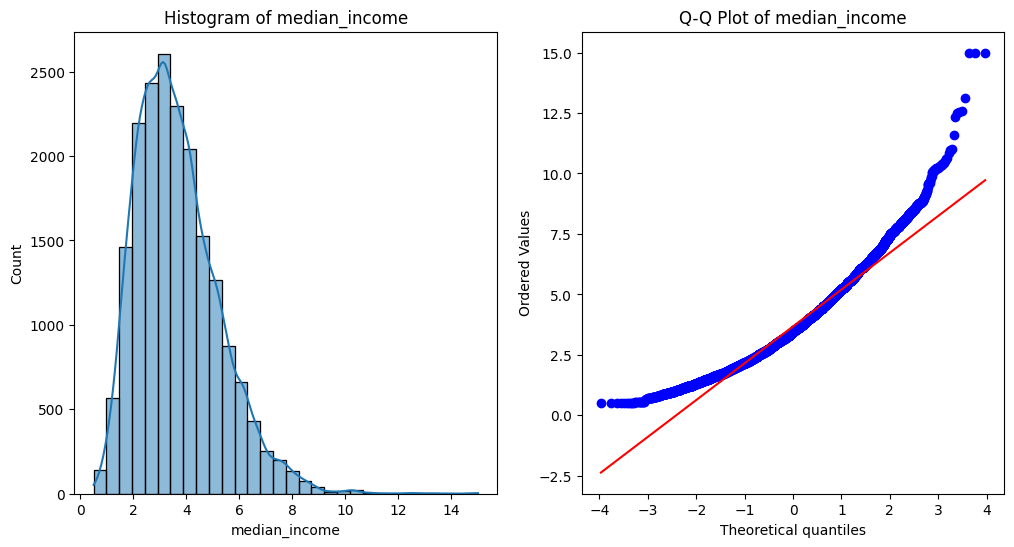

Skewness of median_income: 0.8845527597809991
Min-Max scaled median_income


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\521469901.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = scaler.fit_transform(data_filtered[[feature]])


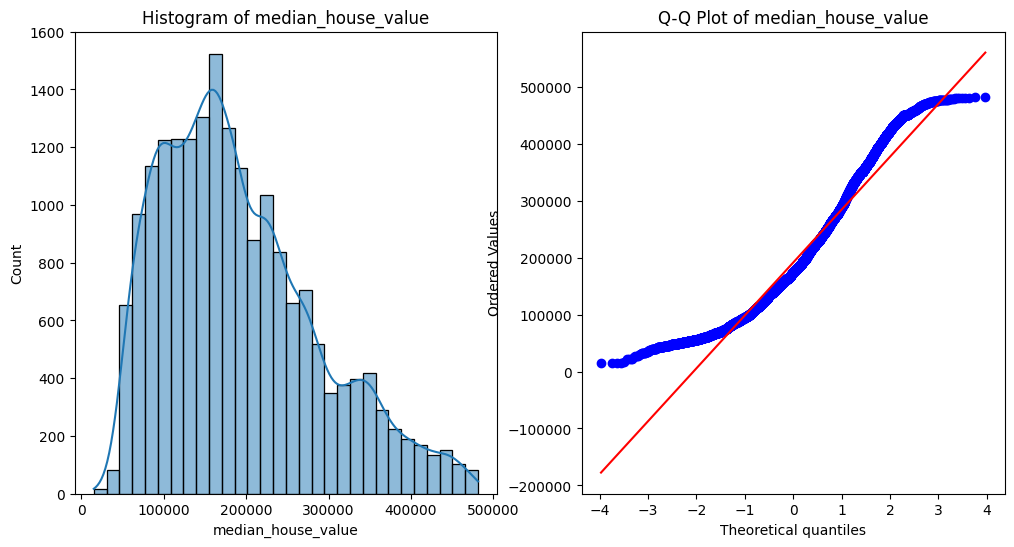

Skewness of median_house_value: 0.7509824684296779
Min-Max scaled median_house_value


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\521469901.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = scaler.fit_transform(data_filtered[[feature]])


In [21]:
# Identify numerical features
numerical_features = data_filtered.select_dtypes(include=['float64', 'int64']).columns

# Step 1: Check distribution and handle missing values
for feature in numerical_features:
    # Visualize the distribution
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_filtered[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data_filtered[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
    
    plt.show()

    # Calculate skewness
    skewness = data_filtered[feature].skew()
    print(f'Skewness of {feature}: {skewness}')

    # Step 2: Impute missing values
    if data_filtered[feature].isnull().sum() > 0:  # Check if there are missing values
        if abs(skewness) < 0.5:  # Approximately normal
            mean_value = data_filtered[feature].mean()
            data_filtered[feature].fillna(mean_value, inplace=True)
            print(f'Filled {feature} with mean: {mean_value}')
        else:  # Skewed
            median_value = data_filtered[feature].median()
            data_filtered[feature].fillna(median_value, inplace=True)
            print(f'Filled {feature} with median: {median_value}')
    
    # Step 3: Normalize according to distribution
    if abs(skewness) < 0.5:  # Approximately normal
        scaler = StandardScaler()
        data_filtered[feature] = scaler.fit_transform(data_filtered[[feature]])
        print(f'Standardized {feature}')
    elif abs(skewness) >= 0.5:  # Skewed
        if skewness > 1 or skewness < -1:  # Highly skewed
            # Apply logarithmic transformation
            data_filtered[feature] = np.log1p(data_filtered[feature])
            print(f'Log transformed {feature}')
        else:
            # Mildly skewed can use Min-Max Scaling
            scaler = MinMaxScaler()
            data_filtered[feature] = scaler.fit_transform(data_filtered[[feature]])
            print(f'Min-Max scaled {feature}')

##### 5. (3 points) Encode categorical variables using using appropriate method based on feature characteristics.


##### Since, its a Nominal categorical variable we will use One-Hot Encoding

In [22]:
# One-Hot Encoding for nominal categorical variables
data = pd.get_dummies(data_filtered, columns=['ocean_proximity'], drop_first=True)

In [23]:
# Check the new shape of the data and the first few rows
print(data_filtered.shape)
print(data_filtered.head())

(19259, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.589994  1.890686           -0.984305     5.545177        4.304065   
1   1.267719  0.349238           -0.744339     6.429719        5.480639   
2   0.848055 -0.656662            1.895283     6.689599        5.590987   
3  -1.804822  2.170102            0.615466     4.595120        3.367296   
4   0.613243 -0.698574            0.855432     6.202536        5.129899   

   population  households  median_income  median_house_value ocean_proximity  
0    4.454347    3.663562       0.080054            0.000000          INLAND  
1    6.196444    5.105945       0.110350            0.000000          INLAND  
2    6.444131    5.420535       0.254707            0.000000          INLAND  
3    2.944439    2.197225       0.002490            0.000000          INLAND  
4    5.560682    4.934474       0.128743            0.005361       <1H OCEAN  


##### 6. (3 points) Engineer one new feature based on existing features.

##### Engineering a new features `rooms_per_household` this feature is a good measure of the average number of rooms per household. This characteristic could be related to the size of the household and the general living conditions, which could affect the housing prices or appropriateness for various population groups. 

In [24]:
if 'total_rooms' in data_filtered.columns and 'households' in data_filtered.columns:
    
    # Calculate rooms_per_household
    data_filtered.loc[:, 'rooms_per_household'] = data_filtered['total_rooms'] / (data_filtered['households'] + 1e-5)
    
    # Check for any NaN values and fill them with the median
    if data_filtered['rooms_per_household'].isnull().sum() > 0:
        rooms_per_household_median = data_filtered['rooms_per_household'].median()
        data_filtered.loc[:, 'rooms_per_household'].fillna(rooms_per_household_median, inplace=True)

# Verify the new feature
print(data_filtered[['total_rooms', 'households', 'rooms_per_household']].head())

   total_rooms  households  rooms_per_household
0     5.545177    3.663562             1.513599
1     6.429719    5.105945             1.259259
2     6.689599    5.420535             1.234119
3     4.595120    2.197225             2.091320
4     6.202536    4.934474             1.256978


C:\Users\jaivb\AppData\Local\Temp\ipykernel_18240\2443454225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'rooms_per_household'] = data_filtered['total_rooms'] / (data_filtered['households'] + 1e-5)


### Descriptive Analytics Tasks (6 Points):


# 1. (3 points) Investigate the distribution of housing prices across different ocean proximities in California.



In [25]:
summary_stats = data_filtered.groupby('ocean_proximity')['median_house_value'].describe()
print(summary_stats)

                  count      mean       std       min       25%       50%  \
ocean_proximity                                                             
<1H OCEAN        8476.0  0.445129  0.179854  0.005361  0.314900  0.410291   
INLAND           6408.0  0.231378  0.139879  0.000000  0.133710  0.199359   
ISLAND              5.0  0.783366  0.172689  0.584138  0.610933  0.856806   
NEAR BAY         2005.0  0.475787  0.213592  0.016079  0.312970  0.445232   
NEAR OCEAN       2365.0  0.451301  0.210287  0.016079  0.278029  0.432370   

                      75%       max  
ocean_proximity                      
<1H OCEAN        0.546196  1.000000  
INLAND           0.282745  0.989711  
ISLAND           0.932476  0.932476  
NEAR BAY         0.637729  0.993784  
NEAR OCEAN       0.588425  0.998499  


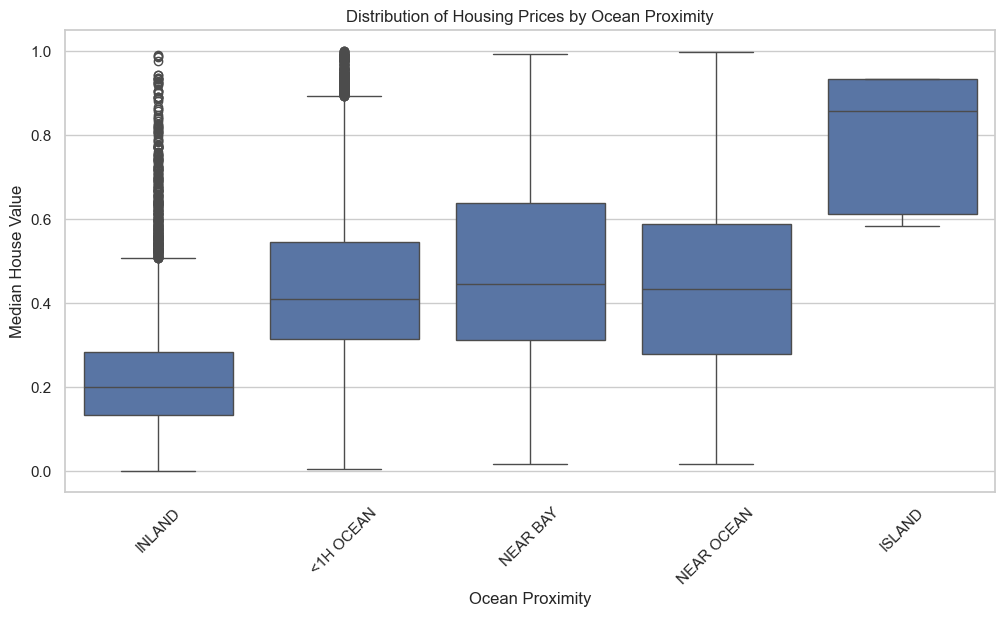

In [26]:
# Set styling
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data_filtered)
plt.title('Distribution of Housing Prices by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

### ML Model Training and Testing Tasks (21 Points):


###### The objective of this section is to develop a linear regression model to predict the median house value in a given area, based on several predictors from the California Housing dataset. You will implement the linear regression algorithm from scratch, without using high-level libraries like scikit-learn (only Numpy and Pandas mainly). This exercise will deepen your understanding of the linear regression algorithm based on the discussed lecture content.


# 1. (1 point) Split the cleaned data from the first section into training and testing sets (e.g., 80% training, 20% testing).
# 2. (8 points) Implement the closed-form solution to linear regression:
# 𝜃 = (𝑋𝑇𝑋)−1𝑋𝑇𝑦
# a. where 𝜃 is the vector of weights (including the bias (𝑏)), 𝑋 is the feature matrix with a column of ones added to represent the intercept, and 𝑦 is the vector of target values.
# b. Use your implementation to compute the coefficients for your linear regression modelon the training dataset split.


In [28]:
print(data_filtered.dtypes)  # Check data types for all columns
data_filtered.head(5)


longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
rooms_per_household    float64
dtype: object


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-1.589994,1.890686,-0.984305,5.545177,4.304065,4.454347,3.663562,0.080054,0.000000,INLAND,1.513599
1,1.267719,0.349238,-0.744339,6.429719,5.480639,6.196444,5.105945,0.110350,0.000000,INLAND,1.259259
2,0.848055,-0.656662,1.895283,6.689599,5.590987,6.444131,5.420535,0.254707,0.000000,INLAND,1.234119
3,-1.804822,2.170102,0.615466,4.595120,3.367296,2.944439,2.197225,0.002490,0.000000,INLAND,2.091320
4,0.613243,-0.698574,0.855432,6.202536,5.129899,5.560682,4.934474,0.128743,0.005361,<1H OCEAN,1.256978


In [29]:
# Step 1: Check the data types
print("Data types before processing:")
print(data_filtered.dtypes)

# Step 2: Separate features and target
features = data_filtered.drop(columns=['median_house_value'])
target = data_filtered['median_house_value']

# Step 3: Convert categorical variables to numerical (One-Hot Encoding)
features = pd.get_dummies(features, drop_first=True)

# Step 4: Check feature types after encoding
print("\nData types after One-Hot Encoding:")
print(features.dtypes)

# Step 5: Convert all columns to numeric
features = features.apply(pd.to_numeric, errors='coerce')

# Step 6: Check for NaN values and handle them
print("\nMissing values in features:")
print(features.isnull().sum())

# Drop missing values (or you can use fillna)
features = features.dropna()
target = target.loc[features.index]  # Align target with features after drop

# Step 7: Check final shapes and types
print("\nFinal Features Shape:", features.shape)
print("Final Target Shape:", target.shape)

# Convert to NumPy arrays
X = np.array(features)
y = np.array(target)

# Final checks to ensure they are numeric
print("\nX dtype:", X.dtype)
print("y dtype:", y.dtype)

# Step 8: Train/Test Split
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
split_index = int(0.8 * len(indices))
train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# Add a bias term to the training dataset
X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Check if everything is in order before calling the regression function
print("\nTraining Data Shape with Bias:", X_train_with_bias.shape)

Data types before processing:
longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
rooms_per_household    float64
dtype: object

Data types after One-Hot Encoding:
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
rooms_per_household           float64
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object

Missing values in features:
longitude                     0
latitude  

In [30]:
# Ensure all features are numeric and convert booleans to floats
features = features.astype(float)

# Skillfully handle boolean columns that result from One-Hot Encoding:
# This ensures boolean columns are converted to float
for column in features.columns:
    if features[column].dtype == 'bool':
        features[column] = features[column].astype(float)

# Now, check the updated data types
print("\nData types after conversion:")
print(features.dtypes)

# Convert to NumPy arrays
X = np.array(features)
y = np.array(target)

# Check final dtypes
print("\nX dtype:", X.dtype)
print("y dtype:", y.dtype)

# Proceed with the train/test split again
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
split_index = int(0.8 * len(indices))
train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# Add a bias term to the training dataset
X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Final shape check
print("\nTraining Data Shape with Bias:", X_train_with_bias.shape)


Data types after conversion:
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
rooms_per_household           float64
ocean_proximity_INLAND        float64
ocean_proximity_ISLAND        float64
ocean_proximity_NEAR BAY      float64
ocean_proximity_NEAR OCEAN    float64
dtype: object

X dtype: float64
y dtype: float64

Training Data Shape with Bias: (15407, 14)


In [31]:
def closed_form_linear_regression(X, y):
    # Add the bias term
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Adding a column of ones
    
    # Calculate (X^T * X)
    X_transpose = np.transpose(X_with_bias)
    X_transpose_dot_X = np.dot(X_transpose, X_with_bias)
    
    # Calculate the inverse of (X^T * X)
    X_transpose_dot_X_inv = np.linalg.inv(X_transpose_dot_X)
    
    # Calculate (X^T * y)
    X_transpose_dot_y = np.dot(X_transpose, y)
    
    # Calculate theta
    theta = np.dot(X_transpose_dot_X_inv, X_transpose_dot_y)
    
    return theta

# 3. (2 points) Print the learned coefficients (weights) of the model.
# a. Comment on which feature the model gave higher weight to in the weight vector.


In [32]:
# Assuming X_train and y_train have been defined
theta = closed_form_linear_regression(X_train, y_train)
print("Coefficients (Theta):", theta)

Coefficients (Theta): [ 0.11552358 -0.11242044 -0.11308096  0.02353062 -0.14245291  0.18087284
 -0.15697545  0.14502536  1.28309145  0.18220986 -0.06918794  0.30905538
 -0.02045125 -0.00245938]


In [33]:
# Create a Pandas Series with feature names and their corresponding weights
feature_names = ['Intercept'] + list(features.columns)  # Include intercept
coefficients = pd.Series(theta, index=feature_names)

# Display the coefficients with labels
print("\nLearned Coefficients with Feature Names:\n", coefficients)

# Identify the feature with the highest weight
highest_weight_feature = coefficients.idxmax()
highest_weight_value = coefficients.max()

print(f"\nThe feature with the highest weight is '{highest_weight_feature}' with a weight of {highest_weight_value:.4f}.")


Learned Coefficients with Feature Names:
 Intercept                     0.115524
longitude                    -0.112420
latitude                     -0.113081
housing_median_age            0.023531
total_rooms                  -0.142453
total_bedrooms                0.180873
population                   -0.156975
households                    0.145025
median_income                 1.283091
rooms_per_household           0.182210
ocean_proximity_INLAND       -0.069188
ocean_proximity_ISLAND        0.309055
ocean_proximity_NEAR BAY     -0.020451
ocean_proximity_NEAR OCEAN   -0.002459
dtype: float64

The feature with the highest weight is 'median_income' with a weight of 1.2831.


##### The model highlights median income as a crucial element in the determination of housing prices, illustrating how income levels have a major impact on real estate valuation in accordance with overall economic principles. This perspective may prove beneficial for real estate stakeholders, policymakers, and urban planners by highlighting the significance of income in housing market patterns. In addition, it emphasizes the importance of customized strategies in housing policy and community development efforts that take into consideration differences in income.


# 4. (4 points) Utilize the learned coefficients to generate predictions on the test dataset split, where: 
# 𝑦̂ = 𝑋𝜃


In [34]:
X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))


In [35]:
y_pred = np.dot(X_test_with_bias, theta)  # y_hat = X * theta

# Display the predictions
print("Predictions on the test dataset:")
print(y_pred)

Predictions on the test dataset:
[0.33961029 0.54973063 0.37548318 ... 0.33492631 0.34345063 0.54529211]


In [36]:
print("\nActual Values vs Predicted Values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.4f}, Predicted: {predicted:.4f}")


Actual Values vs Predicted Values:
Actual: 0.3593, Predicted: 0.3396
Actual: 0.5985, Predicted: 0.5497
Actual: 0.2232, Predicted: 0.3755
Actual: 0.5854, Predicted: 0.5779
Actual: 0.3106, Predicted: 0.3816
Actual: 0.4304, Predicted: 0.5577
Actual: 0.2761, Predicted: 0.3165
Actual: 0.4617, Predicted: 0.4579
Actual: 0.5668, Predicted: 0.4778
Actual: 0.4084, Predicted: 0.4395
Actual: 0.4592, Predicted: 0.3366
Actual: 0.3698, Predicted: 0.3385
Actual: 0.2997, Predicted: 0.4540
Actual: 0.0607, Predicted: 0.1131
Actual: 0.3042, Predicted: 0.3835
Actual: 0.2965, Predicted: 0.2578
Actual: 0.4967, Predicted: 0.3480
Actual: 0.8339, Predicted: 0.6642
Actual: 0.2444, Predicted: 0.3901
Actual: 0.6030, Predicted: 0.4771
Actual: 0.5573, Predicted: 0.4133
Actual: 0.3676, Predicted: 0.5143
Actual: 0.0973, Predicted: 0.1467
Actual: 0.1456, Predicted: 0.1566
Actual: 0.3220, Predicted: 0.4758
Actual: 0.2332, Predicted: -0.0427
Actual: 0.4982, Predicted: 0.5279
Actual: 0.6229, Predicted: 0.5587
Actual: 0.1

# 5. (4 Points) Implement the following evaluation metrics using NumPy functions only:
# a. Mean Absolute Error (MAE)
# b. Mean Squared Error (MSE)


In [37]:
# Function to calculate Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

Mean Absolute Error (MAE): 0.0902
Mean Squared Error (MSE): 0.0149


# 6. (2 Points) Evaluate the model's performance on the test set using the implemented metrics and report your results.
# a. Comment on the model’s performance

##### During the assessment of the linear regression model's performance on the test dataset, it was determined that the Mean Absolute Error (MAE) amounted to 0.0902 while the Mean Squared Error (MSE) was 0.0149. The Mean Absolute Error (MAE) shows that the model's predictions differ from the actual house values by around 0.0902 on average, suggesting a satisfactory level of precision. With a value of 0.0149, the MSE indicates that the model's prediction errors are relatively small, especially considering that larger errors are emphasized by MSE. In general, both measurements show that the model did a good job, offering insights into how features are related to the median house value. Potential enhancements may involve delving into more intricate models, improving feature engineering, and fine-tuning hyperparameters to enhance prediction precision.
